# Computer vision cơ bản

Chúng ta sẽ tiếp tục series Computer Vision này với bài tập về một số hàm, thuật toán cơ bản của OpenCV và một số ứng dụng đơn giản.


## Một số hàm cơ bản của OpenCV

Như ở bài trước, ta đã biết để load ảnh ta sử dụng openCV imread, ảnh trả về sẽ là một mảng numpy, tương tự với OpenCV C++, đối tượng trả về sẽ là đối tượng Mat, tức Matrix :3. Chắc các bạn cũng hiểu là xử lý ảnh nếu xét trên góc độ này chủ yếu là phép thao tác ma trận chứ :3. Và chúng ta cũng đã xem qua về phép Convolution, tức xét sơ qua về xử lý ảnh theo hướng xử lý tín hiệu số 2 chiều :3. Tuy nhiên thực tế OpenCV có quá nhiều hàm sẵn rồi, cài lại thuật toán là việc làm khá là không cần thiết lắm, vì vậy chúng ta sẽ đi qua các hàm có trong OpenCV.


## 1. Các hàm lưu ảnh, đọc ảnh, lưu video, đọc video:

### Hàm đọc ảnh:

* Thực ra mấy cái này các bạn có thể tham khảo tài liệu của OpenCV cho nhanh =))) *

Như bài trước ta đã dùng imread:

Cú pháp (Syntax):



In [2]:
import cv2
import numpy as np

img = cv2.imread('cat.jpg')

Hàm này sẽ đọc một ảnh lưu thành một mảng numpy, chú ý hệ màu ở đây là BGR (blue - green -red) nên ở bài trước ta phải convert thành ảnh RGB, để đọc ảnh thành trắng đen ta làm như sau:


In [3]:
img = cv2.imread('cat.jpg',0)

### Hàm ghi ảnh

Để có thể đi khoe kết quả xử lý ảnh vip pro, tất nhiên ta phải lưu được ảnh ròi =)) 

In [4]:
cv2.imwrite('cat.jpg',img)

True

Ảnh đã được đọc, chuyển xám vào lưu lại:
![image.png](./tut3/1.png)

### Hàm đọc video:

In [ ]:
cap = cv2.VideoCapture('./pedestrian.mp4')

Hàm này có thể lấy cả nguồn từ webcam,các bạn có thể chọn 0 hoặc 1 tùy theo máy mình để mở webcam nhe :3

Do bản chất của video là một chuỗi các ảnh nên vấn để đọc video ta cần phải dùng while. Do việc xử lý video trên jupyter khá là chuối nên ta sẽ dùng file .py để chạy :3 các bạn có thể dùng visual code hay bất kì cái gì để chạy code sau :3 (2020 rồi cài visual code với chỉnh setting.json để chạy vitrualenv phải làm được nhé :> ) 

In [ ]:
import cv2

cap = cv2.VideoCapture('/path/to/video') 

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

 Giải thích code:
 
 + cap là đối tượng VideoCapture của OpenCV, nó có tác dụng đọc video từ source. (Phần đối tượng sẽ có trong slide Python tiếp theo, cơ mà mình lười quá nên chưa làm xong :3 ). /path/to/video là đường dẫn tới video, các bạn cần tham khảo phần đường dẫn trực tiếp và gián tiếp (mình sẽ đưa vào slide python cơ bản tiếp theo).
 + Câu lệnh ret , frame = cap.read() sẽ đọc file video (hoặc lấy video từ webcam) để hiển thị ra màn hình, method (phương thức của đối tượng cap, bạn nào đã ngâm qua OOP sẽ hiểu ) trả về 2 giá trị, ret là giá trị độ lớn của frame ảnh và frame và mảng numpy. 
 + Câu lệnh gray = ... là câu lệnh convert từ hệ màu BGR sang GRAY. 
 + Câu lệnh cv2.imshow ... là câu lệnh để hiển thị frame đã xử lý lên màn hình.
 + Để có thể thoát khỏi màn vòng lặp while, chương trình cần nút chờ lệnh: câu lệnh if cv2.waitKey(1).. thực hiện điều này, và nó trả về một kí tự ASCII từ bàn phím. Trong trường hợp này là phím 'q' trên bàn phím. Nếu đúng như phím này được bấm nó sẽ break ra khỏi while.
 + Sau khi thoát ra, vì không biết là đang sử dụng webcam hay không nên ta cần phái release cap ra (nếu không webcam sẽ bị lock và không sử dụng được cho các ứng dụng khác).
 + Câu lệnh cuối chắc các bạn cũng hiều ròi :3 

Dĩ nhiên là các bạn cũng có thể sử dụng những lệnh trên tùy ý để tạo thành GUI của OpenCV, tham khảo thêm ở:
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_table_of_contents_gui/py_table_of_contents_gui.html

### Lưu video:

Khác với ảnh là ta chỉ cần imwrite, video có khá nhiều kiểu mã hóa, mp4, avi,... vậy nên hàm ghi video cũng có chút khác biệt:

Để lưu video, ta tạo đối tượng VideoWriter_fourcc, fourcc là một chuẩn mã hóa (https://en.wikipedia.org/wiki/FourCC). Cú pháp như sau:

fourcc = cv2.VideoWriter_fourcc(*'XVID')

Trong đó tham số đưa vào có thể là

"In Fedora: DIVX, XVID, MJPG, X264, WMV1, WMV2. (XVID is more preferable. MJPG results in high size video. X264 gives very small size video)

In Windows: DIVX (More to be tested and added)

In OSX : (I don’t have access to OSX. Can some one fill this?)"

Tham khảo https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html)

Sau đó ta tạo đối tượng VideoWriter:

out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

+ output.avi là đường dẫn đến file lưu video 
+ fourcc là encode đã tạo 
+ 20.0 là fps để ghi video
+ (640, 480) là tuple lưu kích thước video

# Phần này các bạn tự test nhé :3


## 2. Các thao tác trên ảnh

Vì ảnh thực chất là các ma trận Numpy nên việc ta sử dụng các thao tác trên ma trận để vẽ vời là chuyện rất bình thường, như OpenCV có hàm mà, nên tội gì phải khổ :v

### Hàm vẽ :

Các hàm vẽ trong OpenCV là :

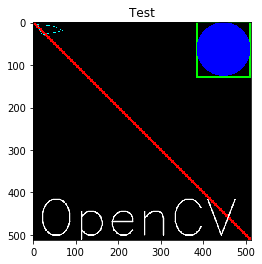

In [3]:

# Create a black image
img = np.zeros((512,512,3), np.uint8)

cv2.line(img,(0,0),(511,511),(255,0,0),5)# Vẽ một đoạn thẳng 2 đầu là (511,511) và (0,0), màu (255,0,0) dày 5 pixel
cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)# Vẽ hình chữ nhật với điểm trái cao nhất là (384,0),
#điểm phải dưới thấp nhất là (510,128) màu xanh lá, độ dày 3
cv2.circle(img,(447,63), 63, (0,0,255), -1) # Vẽ đường tròn, tâm (447,63), màu đỏ , -1 là có fill

#Vẽ gấp khúc (polygon)
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32) #mảng numpy chứa các điểm của polygon
pts = pts.reshape((-1,1,2)) # Đưa mảng về dạng đúng cho hàm
cv2.polylines(img,[pts],True,(0,255,255)) # Vẽ polygon
#Ghi chữ
font = cv2.FONT_HERSHEY_SIMPLEX #chọn font, font có trong cv2 luôn thì đỡ conflict
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
# Theo thứ tự : hình cần ghi, text cần ghi, vị trí bắt đầu, font, độ dày, màu, tỉ lệ font, dạng đường vẽ
from matplotlib import pyplot as plt
plt.imshow(img)
plt.title("Test")
plt.show()

Các bạn tìm hiểu thêm ở: https://docs.opencv.org/master/dc/da5/tutorial_py_drawing_functions.html

## ROI (Region of Interest)

ROI là vùng quan tâm, tức khu vực ta muốn xử lý, như các bạn đã biết thì ngày này ảnh full HD (có che :)) ) có kích thước là 1920 * 1080, và các thuật toán xử lý ảnh hầu như đều O(n^2) trở lên :> (là rất phức tạp đó) chưa kể đến neural network nó còn xử lý hàng nhiều nữa, thế nên thu gọn ảnh là khá cần thiết.

Cách làm thì đơn giản là xài cách cắt mảng numpy thôi.

Ngoài ra còn các phép quay, thêm padding,... cơ mà mình nghĩ đến đây là tạm ổn, các bạn có thể tham khảo thêm trong doc OpenCV

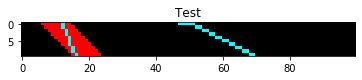

In [6]:
ROI = img[10:20,0:100]
plt.imshow(ROI)
plt.title("Test")
plt.show()

## Phép toán bitwise trên ảnh

*Tham khảo ở https://pysource.com/2018/01/29/bitwise-operators-opencv-3-4-with-python-3-tutorial-7/

Phép Bitwise trong ảnh phần nào cũng giống phép bitwise ta đã học với vi điều khiển, mục đích của phép này là khi sử dụng ta có thể tạo ra một "mặt nạ" rồi sau đó để tách vùng đã chọn ra.

# 3 Hệ màu của ảnh, convert hệ màu, dò màu

Trong xử lý ảnh, người ta thường dùng các hệ màu như binary, RGB, BGR, hay HSV, mỗi hệ màu lại có ưu và nhược điểm khác nhau, ta sẽ nói đến chúng trong bài này.

Hệ màu RGB:
![image.png](./tut3/2.png)
Hệ màu này phổ biến nhất, được sử dụng rất nhiều trong máy tính, ảnh, phim....

Hệ màu HSV

Không gian màu HSB, còn gọi là không gian màu HSV, là một không gian màu dựa trên ba số liệu:

H: (Hue) Vùng màu
    
S (Saturation) Độ bão hòa màu
    
B (hay V): (Bright hay Value)Độ sáng


Ưu điểm của hệ màu này là giá trị màu là 1 giá trị, và nằm trên một hình tròn, còn các giá trị độ sáng và độ bão hòa sẽ thay đổi với S và V, do đó màu sắc trong hệ HSV sẽ ít bị thay đổi do độ sáng hơn RGB

(trích wiki)

![image.png](tut3/3.png)
Theo mình nhận xét thì hệ màu này ít nhạy cảm với sự thay đổi ánh sáng hơn là RGB.

Hệ màu xám (grayscale) 
![image.png](tut3/4.png)
Ưu điểm là tạo ra cảm giác vintage (đùa thôi :> ) và hơn nữa là nhanh hơn do chỉ cần phải xử lý 1 layer ảnh thay vì 3 layer

Để chuyển hệ màu:

In [5]:
import cv2 
img = cv2.imread('cat.jpg')
print(img[23,167,:])

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
print(hsv[23,167,:])

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray[23,167])

[102 102 102]
[  0   0 102]
102


## Lấy ngưỡng ảnh 

Để thực hiện dò theo màu, ta thường dùng hệ màu HSV do ưu điểm của nó là đỡ nhạy cảm với ánh sáng hơn (thực ra theo kinh nghiệm của mình thì cũng củ chuối lắm :))) ), ta có thể lấy giới hạn màu ở một điểm nào đó và so sánh với ngưỡng đó, cái này hoàn toàn có thể cài lại bằng numpy, cơ mà ta sẽ xài hàm cho nhanh:

Cú pháp:

threshold = cv2.inRange(frame_HSV, (low_H, low_S, low_V), (high_H, high_S, high_V))

Như các bạn đã biết thì một pixel HSV cũng có 3 giá trị HSV, nên lấy ngưỡng cao và thấp sẽ do một tuple đưa vào hàm

Giá trị trả về là frame ảnh trong đó phần màu đã được tách ra theo dạng binary

Một ví dụ về sử dụng hệ màu HSV để dò màu:

In [ ]:
import cv2 as cv
import numpy as np
cap = cv.VideoCapture(0)
while(1):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)
   
    res = cv.bitwise_and(frame,frame, mask= mask) # Phép bitwise and này để lấy phần có màu
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break
cv.destroyAllWindows()

![image.png](tut3/5.png)

 * Copy ra một file python và chạy nhé :3 VideoCapture(0) nên chuẩn bị ngắm mặt mình trong webcam đi :v "

Trong thực tế mà nói thì mình ít khi nào mà thấy dò màu mà mò ra đúng màu, môi trường cũng là vấn đề quan trọng, môi trường mà có màu gần giống thì cũng khá căng thẳng :3, vì vậy có 2 cách giải quyết đề xuất cho xử lý màu: Sử dụng ROI hoặc là sử dụng GUI tìm ngưỡng, hoặc lấy giá trị màu tại một pixel đề dò, cách giải quyết bằng bar track như ở ví dụ sau (lưu ý là cop hết ra file python nha):

Khai báo các hàm, biến cần thiết

In [ ]:
import cv2 as cv
import argparse
max_value = 255
max_value_H = 360//2
low_H = 0
low_S = 0
low_V = 0
high_H = max_value_H
high_S = max_value
high_V = max_value
window_capture_name = 'Video Capture'
window_detection_name = 'Object Detection'
low_H_name = 'Low H'
low_S_name = 'Low S'
low_V_name = 'Low V'
high_H_name = 'High H'
high_S_name = 'High S'
high_V_name = 'High V'

Dưới đây là các hàm tạo đối tượng trackbar, có 6 hàm cho 6 mức của HSV cao thấp của HSV:

In [ ]:
def on_low_H_thresh_trackbar(val):
    global low_H
    global high_H
    low_H = val
    low_H = min(high_H-1, low_H)
    cv.setTrackbarPos(low_H_name, window_detection_name, low_H)
def on_high_H_thresh_trackbar(val):
    global low_H
    global high_H
    high_H = val
    high_H = max(high_H, low_H+1)
    cv.setTrackbarPos(high_H_name, window_detection_name, high_H)
def on_low_S_thresh_trackbar(val):
    global low_S
    global high_S
    low_S = val
    low_S = min(high_S-1, low_S)
    cv.setTrackbarPos(low_S_name, window_detection_name, low_S)
def on_high_S_thresh_trackbar(val):
    global low_S
    global high_S
    high_S = val
    high_S = max(high_S, low_S+1)
    cv.setTrackbarPos(high_S_name, window_detection_name, high_S)
def on_low_V_thresh_trackbar(val):
    global low_V
    global high_V
    low_V = val
    low_V = min(high_V-1, low_V)
    cv.setTrackbarPos(low_V_name, window_detection_name, low_V)
def on_high_V_thresh_trackbar(val):
    global low_V
    global high_V
    high_V = val
    high_V = max(high_V, low_V+1)
    cv.setTrackbarPos(high_V_name, window_detection_name, high_V)

Tạo đối tượng video capture, các bạn có thể lấy video mãu hoặc webcam tùy ý, sau đó các hàm cv.createTrackbar sẽ thêm từng trackbar vào cửa sổ OpenCV đã tạo (phần dò cạnh các bạn cũng có thể thực hiện như trên)

In [ ]:
cap = cv.VideoCapture(0)
cv.namedWindow(window_capture_name)
cv.namedWindow(window_detection_name)
cv.createTrackbar(low_H_name, window_detection_name , low_H, max_value_H, on_low_H_thresh_trackbar)
cv.createTrackbar(high_H_name, window_detection_name , high_H, max_value_H, on_high_H_thresh_trackbar)
cv.createTrackbar(low_S_name, window_detection_name , low_S, max_value, on_low_S_thresh_trackbar)
cv.createTrackbar(high_S_name, window_detection_name , high_S, max_value, on_high_S_thresh_trackbar)
cv.createTrackbar(low_V_name, window_detection_name , low_V, max_value, on_low_V_thresh_trackbar)
cv.createTrackbar(high_V_name, window_detection_name , high_V, max_value, on_high_V_thresh_trackbar)

 Đến đây là phần chương trình chính, phần này sẽ chạy một vòng lặp while để lấy ảnh từ cam hoặc file. 
 

Câu lệnh cv.imshow(window_capture_name, frame) sẽ hiển thị ảnh

Câu lệnh cv.imshow(window_detection_name, frame_threshold) sẽ hiển thị mấy cái trackbar để chọn ngưỡng, ngưỡng này sẽ được cập nhật liên tục vào các biến toàn cục low_H, low_S,...

In [ ]:
while True:
    
    ret, frame = cap.read()
    if frame is None:
        break
    frame_HSV = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    frame_threshold = cv.inRange(frame_HSV, (low_H, low_S, low_V), (high_H, high_S, high_V))
    
    
    cv.imshow(window_capture_name, frame)
    cv.imshow(window_detection_name, frame_threshold)
    
    key = cv.waitKey(30)
    if key == ord('q') or key == 27:
        break

Tham khảo thêm ở https://docs.opencv.org/master/da/d97/tutorial_threshold_inRange.html

## 4 Edge Detection và contour 

Thuật toán phát hiện cạnh CannyEdge là thuật toán tiếp theo ta sẽ nói tới.

Ở bài trước ta đac nói về toán tử Sobel, toán tử này có tác dụng tính đạo hàm của ảnh theo 2 trục x và y,sau đó thuật toán này tính đạo hàm theo x và y như sau:

$Edge\_Gradient \; (G) = \sqrt{G_x^2 + G_y^2} \\ Angle \; (\theta) = \tan^{-1} \bigg(\frac{G_y}{G_x}\bigg)$

Từ cạnh và góc này, ta có thể vẽ ra được cạnh của các đối tượng trong ảnh.

Thuật toán CannyEdge được có thêm các bước như:

+ Giảm nhiễu bằng Gaussian Filter
+ Tìm độ lớn và hướng của đạo hàm ảnh (Sober)
+ Loại bỏ các pixel có tính đạo hàm mà không phải là lớn nhất:
![image.png](tut3/6.png)
Như hình này, việc kiểm tra sẽ được tiến hành giữa các pixel A, B, C sao cho có thể tìm được cực đại địa phương (tức cái giá trị đạo hàm lớn nhất, tương ứng với cạnh của vật thể trong ảnh), các gía trị còn lại được cho bằng 0.
+ Bước cuối chúng ta sẽ chọn 2 giá trị max_val và min_val để chọn ra cạnh nào có độ lớn đạo hàm > max_val sẽ được cho là cạnh đúng, còn nếu < min_val là cạnh chắc chắn không đúng, cạnh ở giữa 2 khoảng này nếu nối vào cạnh đúng sẽ được cho là cạnh đúng, còn không sẽ bị bỏ

*Chú ý: CannyEdge hoạt động tốt nhất khi mà ảnh là ảnh xám (gray)

![image.png](tut3/7.png)

Ở ví dụ này cạnh A là một cạnh đúng do độ lớn đạo hàm (intensity) lớn hơn max_val nên là một cạnh, cạnh C lại bé hơn max_val nhưng nối với A nên vẫn là cạnh đúng, còn B bị bỏ do nằm giữa 2 giá trị max, min

Lý thuyết là vậy, cơ mà thực hành thì chỉ cần 1 câu lệnh:

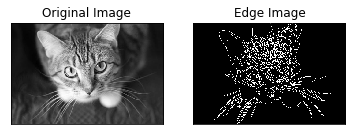

In [20]:
img = cv2.imread('cat.jpg',0)

edges = cv2.Canny(img,100,150) #image, min_val, max_val
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

Như các bạn có thể thấy, với các bức hình có chi tiết sắc nét thì hình sẽ khá khó xác định được cạnh chính, do đó việc sử dụng các thuật toán smoothing ảnh rất quan trọng, trong đó các bộ lọc Gaussian, Median,... sẽ được đề cập đến trong phần sau.

Tham khảo: https://docs.opencv.org/trunk/da/d22/tutorial_py_canny.html

## Contour của ảnh 

Contour là đường đồng mức, tức các đường có cùng một đặc điểm nào đó, ví dụ như trên cùng một cạnh, cùng màu,... hàm contour của OpenCV sẽ nối các điểm đó lại với nhau, từ đó ta có thể sử dụng chúng cho các công việc như tracking, object detection,...

Hàm contour có cú pháp:

im2, contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) (openCV <4.2)

+ Hàm trả về hình đã được tìm contour (im2), danh sách contour (contours), liên hệ giữa các thành phần của contour (hierarchy)

Với OpenCV mới nhất chỉ có 2 giá trị trả về là contours, hierarchy

Vì Contour là một chức năng rất hữu ích nên các hàm đi kèm nó cũng có rất nhiều:

Hàm vẽ contour đã tìm được:

Cú pháp: cv2.drawContours(img, cnt, -1, (0, 255, 0), 2) 
 + img: ảnh cần vẽ contour
 + cnt: tập contour cần vẽ
 + -1: số thứ tự contour cần vẽ, trong trường hợp = -1 là vẽ hết
 + (0,255,0): màu của contour cần vẽ
 + 2: độ dày đường vẽ của contour

Hàm tìm bao lồi (Convex Hull cái này chắc bạn nào học lý thuyết đồ thị chắc đã biết)

hull = cv.convexHull(cnt)

+ cnt là contour đưa vào hàm, hull trả về các điểm lồi lõm của hull

![image.png](tut3/8.png)
*Hình này có gợi ý các bạn Hull để làm gì không :)))

## Bài tập nho nhỏ: xài Convex Hull với dò màu + Canny để đếm số ngón tay :v (Code mạng khá nhiều, mình nhớ hồi xưa học thì bài này là một trong những bài đầu tiên mình làm)


Vẽ đường bao cho Contour:

Vẽ hình chữ nhật bao quanh:
Cú pháp: x,y,w,h = cv2.boundingRect(cnt)

x,y,w,h trong đó x, y là điểm bắt đầu của hình chữ nhật, w, h là dài và rộng của hình chữ nhật, giải thích bằng cách vẽ như sau:

cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

Vẽ hình tròn bao quanh:
Cú pháp:

(x,y),radius = cv2.minEnclosingCircle(cnt) # Đưa contour vào, lấy ra tâm và bán kính (float)

center = (int(x),int(y))                   # nên phải có cái bước này để đổi điểm về int

radius = int(radius) 

cv2.circle(img,center,radius,(0,255,0),2)

*Chú ý: điểm đưa vào cho hàm vẽ hình tròn là tuple*

*Chú ý: trong nhiều trường hợp gặp nhiễu, các xử lý với contour thường là chọn ROI, và chọn contour lớn nhất*

Các bạn có thể tham khảo thêm ở đây: https://docs.opencv.org/master/dd/d49/tutorial_py_contour_features.html

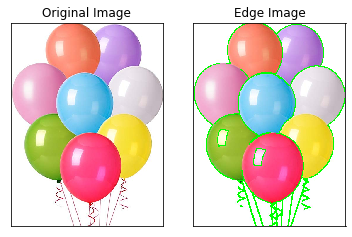

In [29]:
img = cv2.imread('balloon.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
canny = cv2.Canny(gray, 127, 255) # Thực hiện canny edge
cnt, h = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img_after, cnt, -1, (0, 255, 0), 2)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_after,cmap = 'gray')
plt.title('After Image'), plt.xticks([]), plt.yticks([])
plt.show()

## 6 Một số bộ lọc ảnh 

Nếu xét trên phương diện tín hiệu thì ảnh số là một tín hiệu 2 chiều, do đó ta cũng có thể sử dụng các phương pháp của xử lý số tín hiệu để xử lý ảnh như các bộ lọc nhiễu (các bạn có thể đọc thêm xử lý số tín hiệu để biết thêm), việc chứng minh những kết quả này không cần thiết, ta ứng dụng đã :v

### Bộ lọc trung bình

Bộ lọc trung bình sử dụng một kernel Convolution như sau để thực hiện:

$K = \frac{1}{9} \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$

Phép convolution này là phép lấy trung bình cho một ô 3 * 3

Câu lệnh:

blur = cv.blur(img,(5,5))

### Bộ lọc Gaussian

Đây là một bộ lọc rất phổ biến và có tính ứng dụng cao, là phép convolution hàm phân phối Gaussian (phân phối chuẩn) với ảnh:

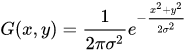
*Hàm phân phối Gaussian 2 chiều*

Câu lệnh:

blur = cv.GaussianBlur(img,(5,5),0) #kernel 5 * 5, kiểu ranh giới cho convolution

Ngoài ra còn các chủ đề như xử lý hình thái ảnh, các thuật toán Threshold, thuật toán xác định đường thẳng Hough Line mà mình chưa đề cập, các bạn có thể tự đọc và tham khảo. Bài tiếp theo sẽ giới thiệu sơ qua về machine learning, deep learning trong xử lý ảnh, sẽ là một bài khá hard core và cũng là 1 (hoặc 2 nếu dài quá) của series này :3

## Bài tập: mình có đính kèm video quả banh, các bạn hãy kết hợp lọc màu, canny và contour để xác định vị trí tâm của quả cầu nhé :3 

Tham khảo một số code:
    
Nhận dạng tay, có sử dụng nhận diện khuôn mặt để lấy màu tay: https://medium.com/@soffritti.pierfrancesco/handy-hands-detection-with-opencv-ac6e9fb3cec1

Ball tracking OpenCV: https://www.pyimagesearch.com/2015/09/14/ball-tracking-with-opencv/
        

# Các tài liệu này được soạn theo tài liệu của OpenCV và một số blog trên mạng